# Preparación de los Datos

## Extracción del Archivo Tratado

In [63]:
import pandas as pd

In [64]:
datos_normalizados = pd.read_csv('datos_normalizados.csv')

In [65]:
datos_normalizados.head()

,ID cliente,Cliente canceló,Género,Cliente es adulto mayor,Cliente tiene pareja,Cliente tiene dependientes,Meses de contrato,Servicio telefónico,Múltiples líneas,Servicio de internet,Seguridad en línea,Respaldo en línea,Protección del dispositivo,Soporte técnico,Televisión por cable,Streaming de películas,Tipo de contrato,Factura en línea,Forma de pago,Facturación mensual,Facturación anual,Facturación diaria
0,0002-ORFBO,0,Femenino,0,1,1,9,1,No,DSL,No,Sí,No,Sí,Sí,No,Un año,1,Cheque por correo,65.6,593.30,2.186667
1,0003-MKNFE,0,Masculino,0,0,0,9,1,Sí,DSL,No,No,No,No,No,Sí,Mensual,0,Cheque por correo,59.9,542.40,1.996667
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,No,Fibra óptica,No,No,Sí,No,No,No,Mensual,1,Cheque electrónico,73.9,280.85,2.463333
3,0011-IGKFF,1,Masculino,1,1,0,13,1,No,Fibra óptica,No,Sí,Sí,No,Sí,Sí,Mensual,1,Cheque electrónico,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Femenino,1,1,0,3,1,No,Fibra óptica,No,No,No,Sí,Sí,No,Mensual,1,Cheque por correo,83.9,267.40,2.796667


## Eliminación de Columnas Irrelevantes

In [66]:
datos_normalizados.drop(['ID cliente'], axis=1, inplace=True)

In [67]:
pd.set_option('display.max_columns', None)
datos_normalizados.head()

,Cliente canceló,Género,Cliente es adulto mayor,Cliente tiene pareja,Cliente tiene dependientes,Meses de contrato,Servicio telefónico,Múltiples líneas,Servicio de internet,Seguridad en línea,Respaldo en línea,Protección del dispositivo,Soporte técnico,Televisión por cable,Streaming de películas,Tipo de contrato,Factura en línea,Forma de pago,Facturación mensual,Facturación anual,Facturación diaria
0,0,Femenino,0,1,1,9,1,No,DSL,No,Sí,No,Sí,Sí,No,Un año,1,Cheque por correo,65.6,593.30,2.186667
1,0,Masculino,0,0,0,9,1,Sí,DSL,No,No,No,No,No,Sí,Mensual,0,Cheque por correo,59.9,542.40,1.996667
2,1,Masculino,0,0,0,4,1,No,Fibra óptica,No,No,Sí,No,No,No,Mensual,1,Cheque electrónico,73.9,280.85,2.463333
3,1,Masculino,1,1,0,13,1,No,Fibra óptica,No,Sí,Sí,No,Sí,Sí,Mensual,1,Cheque electrónico,98.0,1237.85,3.266667
4,1,Femenino,1,1,0,3,1,No,Fibra óptica,No,No,No,Sí,Sí,No,Mensual,1,Cheque por correo,83.9,267.40,2.796667


In [68]:
datos_limpios = datos_normalizados[datos_normalizados['Cliente canceló'].astype(str).isin(['0', '1'])]
datos_limpios['Cliente canceló'] = datos_limpios['Cliente canceló'].astype(int)
datos_limpios['Cliente canceló'].info()


<class 'pandas.core.series.Series'>
Index: 7043 entries, 0 to 7266
Series name: Cliente canceló
Non-Null Count  Dtype
--------------  -----
7043 non-null   int64
dtypes: int64(1)
memory usage: 110.0 KB


/tmp/ipython-input-68-4193415221.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Encoding

In [69]:
columnas_categoricas = ['Género', 'Múltiples líneas', 'Servicio de internet', 'Seguridad en línea', 'Respaldo en línea', 'Protección del dispositivo', 'Soporte técnico', 'Televisión por cable', 'Streaming de películas', 'Tipo de contrato', 'Forma de pago']

datos_tratados = pd.get_dummies(datos_limpios, columns=columnas_categoricas)

In [70]:
datos_tratados

,Cliente canceló,Cliente es adulto mayor,Cliente tiene pareja,Cliente tiene dependientes,Meses de contrato,Servicio telefónico,Factura en línea,Facturación mensual,Facturación anual,Facturación diaria,Género_Femenino,Género_Masculino,Múltiples líneas_No,Múltiples líneas_Sin servicio telefónico,Múltiples líneas_Sí,Servicio de internet_DSL,Servicio de internet_Fibra óptica,Servicio de internet_No,Seguridad en línea_No,Seguridad en línea_Sin servicio de internet,Seguridad en línea_Sí,Respaldo en línea_No,Respaldo en línea_Sin servicio de internet,Respaldo en línea_Sí,Protección del dispositivo_No,Protección del dispositivo_Sin servicio de internet,Protección del dispositivo_Sí,Soporte técnico_No,Soporte técnico_Sin servicio de internet,Soporte técnico_Sí,Televisión por cable_No,Televisión por cable_Sin servicio de internet,Televisión por cable_Sí,Streaming de películas_No,Streaming de películas_Sin servicio de internet,Streaming de películas_Sí,Tipo de contrato_Dos años,Tipo de contrato_Mensual,Tipo de contrato_Un año,Forma de pago_Cheque electrónico,Forma de pago_Cheque por correo,Forma de pago_Tarjeta de crédito (automática),Forma de pago_Transferencia bancaria (automática)
0,0,0,1,1,9,1,1,65.60,593.30,2.186667,True,False,True,False,False,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,False,False,True,False,True,False,False
1,0,0,0,0,9,1,0,59.90,542.40,1.996667,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False
2,1,0,0,0,4,1,1,73.90,280.85,2.463333,False,True,True,False,False,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False
3,1,1,1,0,13,1,1,98.00,1237.85,3.266667,False,True,True,False,False,False,True,False,True,False,False,False,False,True,False,False,True,True,False,False,False,False,True,False,False,True,False,True,False,True,False,False,False
4,1,1,1,0,3,1,1,83.90,267.40,2.796667,True,False,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,0,0,0,13,1,0,55.15,742.90,1.838333,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,False,False,True,False,True,False,False
7263,1,0,1,0,22,1,1,85.10,1873.70,2.836667,False,True,False,False,True,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,True,False,True,False,False,False
7264,0,0,0,0,2,1,1,50.30,92.75,1.676667,False,True,True,False,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False
7265,0,0,1,1,67,1,0,67.85,4627.65,2.261667,False,True,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,False,False,True,True,False,False,False,True,False,False


## Verificación de la Proporción de Cancelación (Churn)

In [71]:
proporcion_cancelacion = datos_tratados['Cliente canceló'].value_counts(normalize=True)
proporcion_cancelacion = (proporcion_cancelacion*100).round(2).astype(str) + '%'
print(f'La proporción de cancelación es: {proporcion_cancelacion}')

La proporción de cancelación es: Cliente canceló
0    73.46%
1    26.54%
Name: proportion, dtype: object


## Normalización o Estandarización

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [73]:
y = datos_tratados['Cliente canceló']
X = datos_tratados.drop(['Cliente canceló'], axis=1)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [75]:
X_train_sin_escalar = X_train.copy()
X_test_sin_escalar = X_test.copy()

In [76]:
columnas_numericas = ['Meses de contrato', 'Facturación mensual', 'Facturación anual', 'Facturación diaria']

In [77]:
escalar = StandardScaler()
X_train[columnas_numericas] = escalar.fit_transform(X_train[columnas_numericas])
X_test[columnas_numericas] = escalar.transform(X_test[columnas_numericas])

## Balanceo de Clases

In [78]:
from imblearn.over_sampling import SMOTE

In [79]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
X_train_sin_escalar_res, y_train_sin_escalar_res = smote.fit_resample(X_train_sin_escalar, y_train)

In [80]:
print('Distribución después de SMOTE:\n')
print(y_train_res.value_counts(normalize=True))

Distribución después de SMOTE:

Cliente canceló
0    0.5
1    0.5
Name: proportion, dtype: float64


#  Correlación y Selección de Variables

## Análisis de Correlación

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
matriz_correlacion = datos_tratados.corr()

In [83]:
correlacion_churn = matriz_correlacion['Cliente canceló'].sort_values(ascending=False)

In [84]:
print(correlacion_churn)

Cliente canceló                                        1.000000
Tipo de contrato_Mensual                               0.405103
Seguridad en línea_No                                  0.342637
Soporte técnico_No                                     0.337281
Servicio de internet_Fibra óptica                      0.308020
Forma de pago_Cheque electrónico                       0.301919
Respaldo en línea_No                                   0.268005
Protección del dispositivo_No                          0.252481
Facturación mensual                                    0.193356
Facturación diaria                                     0.193356
Factura en línea                                       0.191825
Cliente es adulto mayor                                0.150889
Streaming de películas_No                              0.130845
Televisión por cable_No                                0.128916
Televisión por cable_Sí                                0.063228
Streaming de películas_Sí               

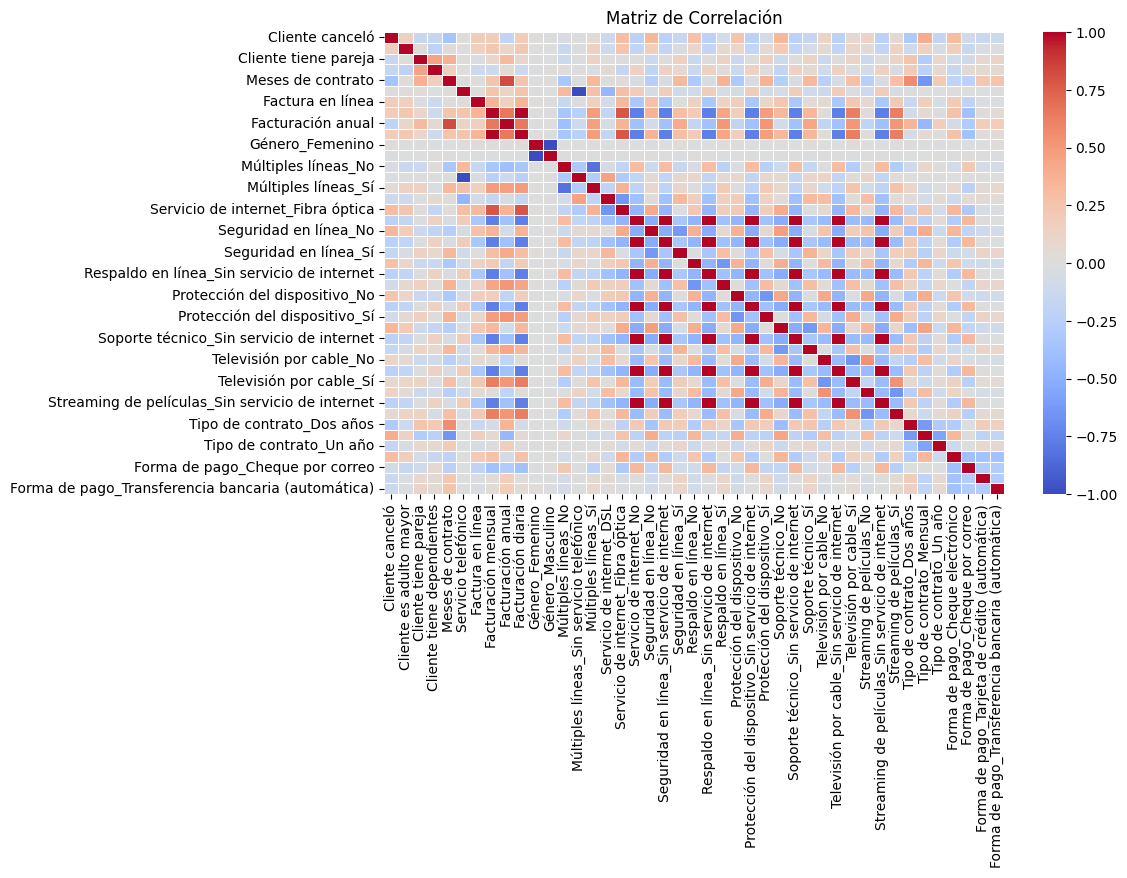

In [85]:
plt.figure(figsize=(10, 6))
sns.heatmap(matriz_correlacion, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

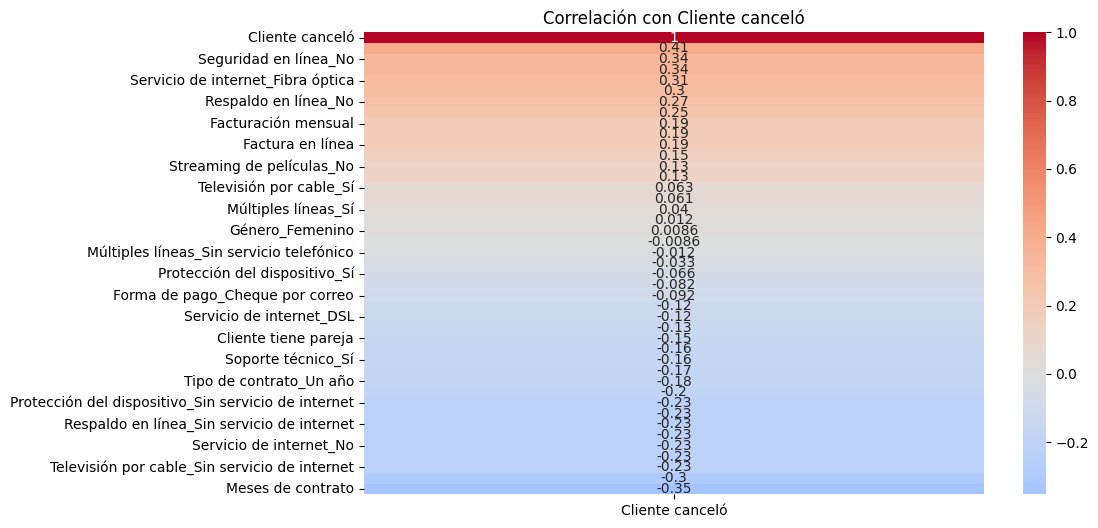

In [86]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlacion_churn.to_frame(), cmap='coolwarm', center=0, annot=True)
plt.title('Correlación con Cliente canceló')
plt.show()

In [87]:
corr_positiva = correlacion_churn.drop('Cliente canceló')
corr_positiva = corr_positiva[corr_positiva > 0]
top_10 = corr_positiva.sort_values(ascending=False)[:10]
top_10

,Cliente canceló
Tipo de contrato_Mensual,0.405103
Seguridad en línea_No,0.342637
Soporte técnico_No,0.337281
Servicio de internet_Fibra óptica,0.308020
Forma de pago_Cheque electrónico,0.301919
Respaldo en línea_No,0.268005
Protección del dispositivo_No,0.252481
Facturación mensual,0.193356
Facturación diaria,0.193356
Factura en línea,0.191825


In [88]:
corr_negativa = correlacion_churn.drop('Cliente canceló')
corr_negativa = corr_negativa[corr_negativa < 0]
bottom_10 = corr_negativa.sort_values(ascending=True)[:10]
bottom_10

,Cliente canceló
Meses de contrato,-0.352229
Tipo de contrato_Dos años,-0.302253
Protección del dispositivo_Sin servicio de internet,-0.227890
Televisión por cable_Sin servicio de internet,-0.227890
Respaldo en línea_Sin servicio de internet,-0.227890
Streaming de películas_Sin servicio de internet,-0.227890
Seguridad en línea_Sin servicio de internet,-0.227890
Servicio de internet_No,-0.227890
Soporte técnico_Sin servicio de internet,-0.227890
Facturación anual,-0.198324


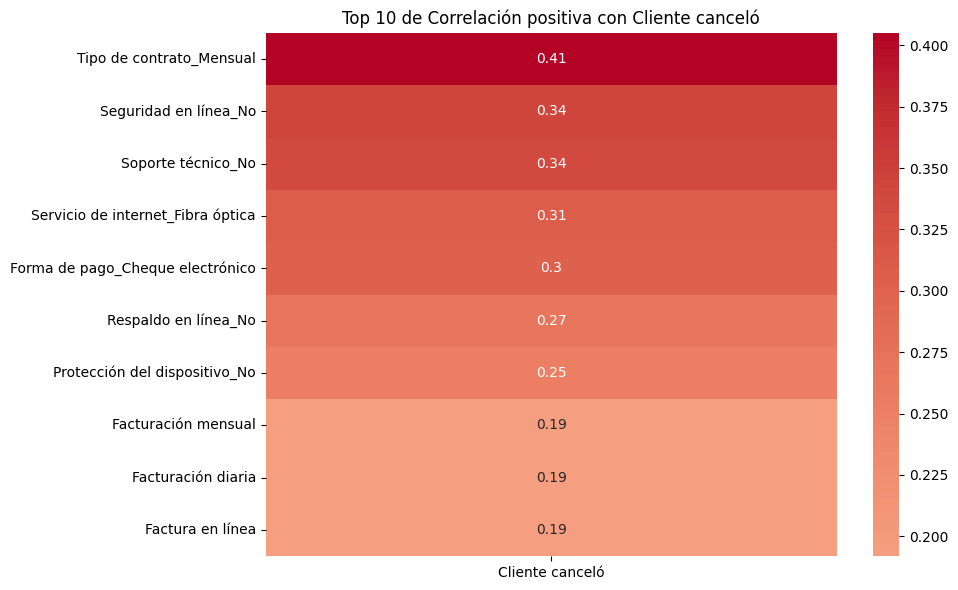

In [89]:
plt.figure(figsize=(10, 6))
sns.heatmap(top_10.to_frame(), cmap='coolwarm', center=0, annot=True)
plt.title('Top 10 de Correlación positiva con Cliente canceló')
plt.tight_layout()
plt.show()

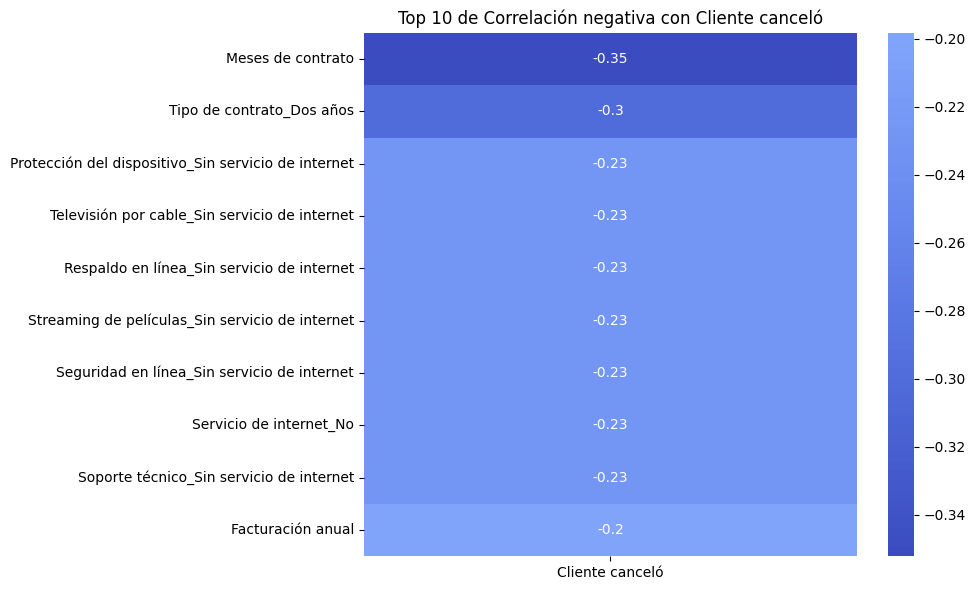

In [90]:
plt.figure(figsize=(10, 6))
sns.heatmap(bottom_10.to_frame(), cmap='coolwarm', center=0, annot=True)
plt.title('Top 10 de Correlación negativa con Cliente canceló')
plt.tight_layout()
plt.show()

## Análisis Dirigido

In [91]:
import plotly.express as px

In [92]:
fig = px.box(datos_limpios, x='Cliente canceló', y='Meses de contrato', color='Cliente canceló', points='all', title='Meses de contrato vs Cancelación')
fig.update_layout(xaxis=dict(tickmode='array', tickvals=[0, 1], ticktext=['No', 'Sí']))
fig.show()

In [93]:
fig = px.box(datos_limpios, x='Cliente canceló', y='Facturación mensual', color='Cliente canceló', points='all', title='Facturación mensual vs Cancelación')
fig.update_layout(xaxis=dict(tickmode='array', tickvals=[0, 1], ticktext=['No', 'Sí']))
fig.show()

In [94]:
fig = px.histogram(datos_limpios, x='Tipo de contrato', color='Cliente canceló', barmode='group', title='Tipo de contrato vs Cancelación')
fig.show()

In [95]:
fig = px.histogram(datos_limpios, x='Forma de pago', color='Cliente canceló', barmode='group', title='Forma de pago vs Cancelación')
fig.show()

In [96]:
datos_limpios['Gasto total'] = datos_limpios['Facturación mensual'] * datos_limpios['Meses de contrato']

fig = px.box(datos_limpios, x='Cliente canceló', y='Gasto total', color='Cliente canceló', points='all', title='Gasto total vs Cancelación')
fig.show()

/tmp/ipython-input-96-2412081075.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Modelado Predictivo

## Creación de Modelos

### 1. Regresión Logística

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
modelo_regresion = LogisticRegression(random_state=42, max_iter=1000)
modelo_regresion.fit(X_train_res, y_train_res)

LogisticRegression(max_iter=1000, random_state=42)

In [99]:
y_pred_reg = modelo_regresion.predict(X_test)

### 2. KNN

In [100]:
from sklearn.neighbors import KNeighborsClassifier

In [101]:
modelo_knn = KNeighborsClassifier()
modelo_knn.fit(X_train_res, y_train_res)

KNeighborsClassifier()

In [102]:
y_pred_knn = modelo_knn.predict(X_test)

### 3. Árbol de Regresión

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [104]:
modelo_arbol = DecisionTreeClassifier(random_state=42)
param_grid = {'max_depth': [3, 5, 10, 15, 20, None]}
grid_search = GridSearchCV(estimator=modelo_arbol, param_grid=param_grid, cv=5, scoring='f1', n_jobs=1)
grid_search.fit(X_train_sin_escalar_res, y_train_sin_escalar_res)

print('Mejor max_depth: ', grid_search.best_params_)

best_arbol = grid_search.best_estimator_

Mejor max_depth:  {'max_depth': 10}


In [105]:
y_pred_arbol = best_arbol.predict(X_test_sin_escalar)

### 4. Random Forest

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
rf = RandomForestClassifier(random_state=42, n_estimators=100)
param_grid = {'max_depth': [3, 5, 10, 15, 20, None]}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1', n_jobs=1)
grid_search.fit(X_train_sin_escalar_res, y_train_sin_escalar_res)

print('Mejor max_depth: ', grid_search.best_params_)

best_rf = grid_search.best_estimator_


Mejor max_depth:  {'max_depth': 10}


In [108]:
y_pred_rf = best_rf.predict(X_test_sin_escalar)

## Evaluación de los Modelos

### 1. Regresión Logística

In [109]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

******************** Evaluación Modelo de Regresión Logística ********************
Exactitud: 0.78
Precisión: 0.57
Recall: 0.69
F1 Score: 0.62

Reporte de Clasificación:

              precision    recall  f1-score   support

  No canceló       0.88      0.81      0.84      1035
     Canceló       0.57      0.69      0.62       374

    accuracy                           0.78      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.80      0.78      0.79      1409

Matriz de Confusión:



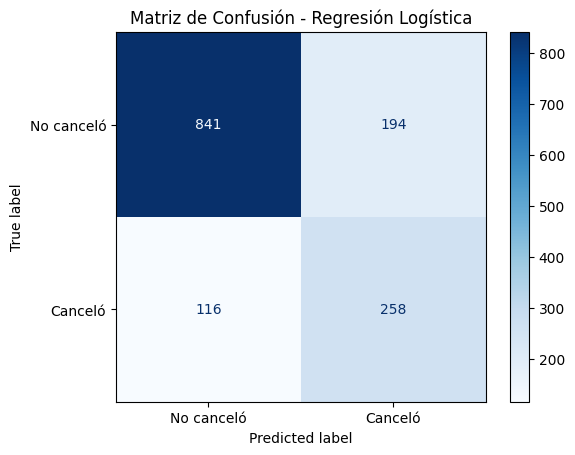

In [110]:
accuracy = accuracy_score(y_test, y_pred_reg)
precision = precision_score(y_test, y_pred_reg)
recall = recall_score(y_test, y_pred_reg)
f1 = f1_score(y_test, y_pred_reg)

print('******************** Evaluación Modelo de Regresión Logística ********************')
print(f'Exactitud: {accuracy:.2f}')
print(f'Precisión: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

print('\nReporte de Clasificación:\n')
print(classification_report(y_test, y_pred_reg, target_names=['No canceló', 'Canceló']))

print('Matriz de Confusión:\n')

matriz = confusion_matrix(y_test, y_pred_reg)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=['No canceló', 'Canceló'])
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

### 2. KNN

******************** Evaluación Modelo KNN ********************
Exactitud: 0.74
Precisión: 0.50
Recall: 0.69
F1 Score: 0.58

Reporte de Clasificación:

              precision    recall  f1-score   support

  No canceló       0.87      0.76      0.81      1035
     Canceló       0.50      0.69      0.58       374

    accuracy                           0.74      1409
   macro avg       0.69      0.72      0.70      1409
weighted avg       0.77      0.74      0.75      1409

Matriz de Confusión:



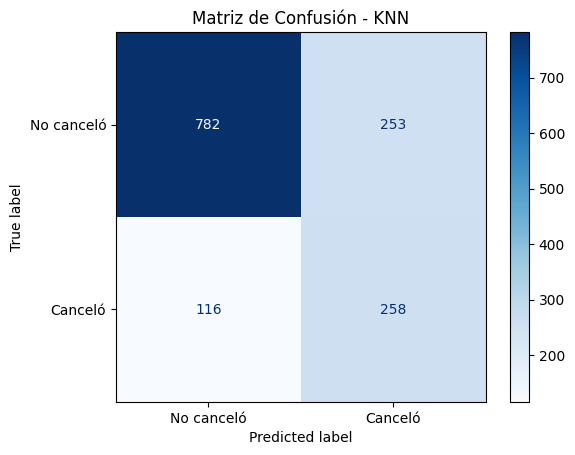

In [111]:
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

print('******************** Evaluación Modelo KNN ********************')
print(f'Exactitud: {accuracy:.2f}')
print(f'Precisión: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

print('\nReporte de Clasificación:\n')
print(classification_report(y_test, y_pred_knn, target_names=['No canceló', 'Canceló']))

print('Matriz de Confusión:\n')

matriz = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=['No canceló', 'Canceló'])
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión - KNN')
plt.show()

### 3. Árbol de Decisión

******************** Evaluación Modelo de Árbol de Decisión ********************
Exactitud: 0.78
Precisión: 0.58
Recall: 0.62
F1 Score: 0.60

Reporte de Clasificación:

              precision    recall  f1-score   support

  No canceló       0.86      0.83      0.85      1035
     Canceló       0.58      0.62      0.60       374

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.72      1409
weighted avg       0.78      0.78      0.78      1409

Matriz de Confusión:



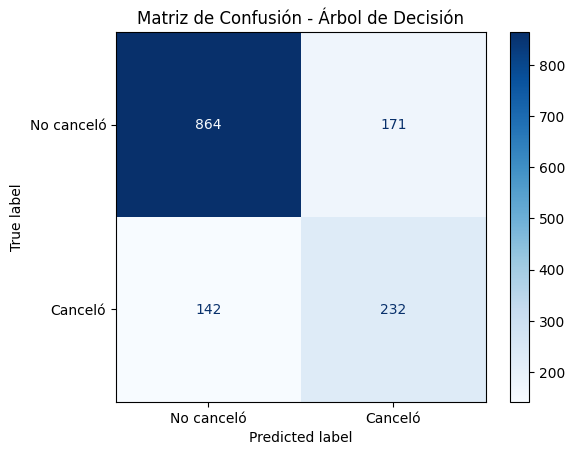

In [112]:
accuracy = accuracy_score(y_test, y_pred_arbol)
precision = precision_score(y_test, y_pred_arbol)
recall = recall_score(y_test, y_pred_arbol)
f1 = f1_score(y_test, y_pred_arbol)

print('******************** Evaluación Modelo de Árbol de Decisión ********************')
print(f'Exactitud: {accuracy:.2f}')
print(f'Precisión: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

print('\nReporte de Clasificación:\n')
print(classification_report(y_test, y_pred_arbol, target_names=['No canceló', 'Canceló']))

print('Matriz de Confusión:\n')

matriz = confusion_matrix(y_test, y_pred_arbol)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=['No canceló', 'Canceló'])
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.show()

### 4. Random Forest

******************** Evaluación Modelo de Random Forest ********************
Exactitud: 0.78
Precisión: 0.58
Recall: 0.63
F1 Score: 0.60

Reporte de Clasificación:

              precision    recall  f1-score   support

  No canceló       0.86      0.83      0.85      1035
     Canceló       0.58      0.63      0.60       374

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.72      1409
weighted avg       0.79      0.78      0.78      1409

Matriz de Confusión:



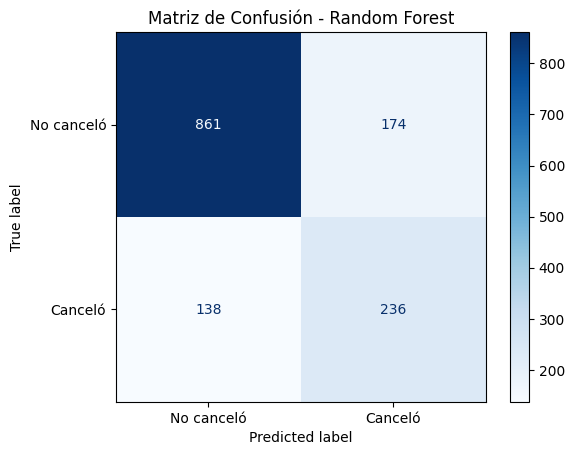

In [113]:
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print('******************** Evaluación Modelo de Random Forest ********************')
print(f'Exactitud: {accuracy:.2f}')
print(f'Precisión: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

print('\nReporte de Clasificación:\n')
print(classification_report(y_test, y_pred_rf, target_names=['No canceló', 'Canceló']))

print('Matriz de Confusión:\n')

matriz = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=['No canceló', 'Canceló'])
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión - Random Forest')
plt.show()

In [114]:
resultados_modelos = {}
resultados_modelos['Regresión Logística'] = {'Exactitud': accuracy_score(y_test, y_pred_reg), 'Precisión': precision_score(y_test, y_pred_reg), 'Recall': recall_score(y_test, y_pred_reg), 'F1 Score': f1_score(y_test, y_pred_reg)}
resultados_modelos['KNN'] = {'Exactitud': accuracy_score(y_test, y_pred_knn), 'Precisión': precision_score(y_test, y_pred_knn), 'Recall': recall_score(y_test, y_pred_knn), 'F1 Score': f1_score(y_test, y_pred_knn)}
resultados_modelos['Árbol de Decisión'] = {'Exactitud': accuracy_score(y_test, y_pred_arbol), 'Precisión': precision_score(y_test, y_pred_arbol), 'Recall': recall_score(y_test, y_pred_arbol), 'F1 Score': f1_score(y_test, y_pred_arbol)}
resultados_modelos['Random Forest'] = {'Exactitud': accuracy_score(y_test, y_pred_rf), 'Precisión': precision_score(y_test, y_pred_rf), 'Recall': recall_score(y_test, y_pred_rf), 'F1 Score': f1_score(y_test, y_pred_rf)}

resultados_df = pd.DataFrame(resultados_modelos).T
print(resultados_df.round(2))

                     Exactitud  Precisión  Recall  F1 Score
Regresión Logística       0.78       0.57    0.69      0.62
KNN                       0.74       0.50    0.69      0.58
Árbol de Decisión         0.78       0.58    0.62      0.60
Random Forest             0.78       0.58    0.63      0.60


# Interpretación y Conclusiones

## Análisis de la Importancia de las Variables

### 1. Regresión Logística

In [115]:
coef = modelo_regresion.coef_[0]
variables = X_train.columns

coef_df = pd.DataFrame({'Variable': variables, 'Coeficiente': coef})
coef_df = coef_df.sort_values(by='Coeficiente', ascending=False)

print(coef_df.head(7))

                                             Variable  Coeficiente
38                   Forma de pago_Cheque electrónico     3.710214
13                                Múltiples líneas_Sí     3.292184
39                    Forma de pago_Cheque por correo     3.216949
36                           Tipo de contrato_Mensual     3.127355
41  Forma de pago_Transferencia bancaria (automática)     3.118948
40      Forma de pago_Tarjeta de crédito (automática)     3.013732
26                                 Soporte técnico_No     2.964573


### 2. KNN

In [116]:
from sklearn.inspection import permutation_importance

In [117]:
result = permutation_importance(modelo_knn, X_test, y_test, n_repeats=10, random_state=42, scoring='accuracy')
importancia_knn = pd.DataFrame({'Variable': X_test.columns, 'Importancia': result.importances_mean}).sort_values(by='Importancia', ascending=False)

print(importancia_knn.head(7))

                            Variable  Importancia
36          Tipo de contrato_Mensual     0.008659
7                  Facturación anual     0.007949
17             Seguridad en línea_No     0.006955
38  Forma de pago_Cheque electrónico     0.005891
3                  Meses de contrato     0.005394
11               Múltiples líneas_No     0.004897
5                   Factura en línea     0.004897


### 3. Árbol de Decisión

In [118]:
importancia_arbol = best_arbol.feature_importances_
importancia_arbol_df = pd.DataFrame({'Variable': X_train.columns, 'Importancia': importancia_arbol}).sort_values(by='Importancia', ascending=False)

print(importancia_arbol_df.head(7))

                            Variable  Importancia
36          Tipo de contrato_Mensual     0.435014
26                Soporte técnico_No     0.099320
3                  Meses de contrato     0.075513
38  Forma de pago_Cheque electrónico     0.067845
7                  Facturación anual     0.046525
8                 Facturación diaria     0.035682
28                Soporte técnico_Sí     0.026580


### 4. Random Forest

In [119]:
importancia_rf = best_rf.feature_importances_
importancia_rf_df = pd.DataFrame({'Variable': X_train.columns, 'Importancia': importancia_rf}).sort_values(by='Importancia', ascending=False)

print(importancia_rf_df.head(7))

                            Variable  Importancia
36          Tipo de contrato_Mensual     0.161272
38  Forma de pago_Cheque electrónico     0.095574
26                Soporte técnico_No     0.095147
17             Seguridad en línea_No     0.072932
7                  Facturación anual     0.070922
3                  Meses de contrato     0.066074
20              Respaldo en línea_No     0.040648


## Conclusión

**INFORME FINAL: Predicción de Cancelación de Clientes**

**1. Rendimiento de Modelos**

Se entrenaron y compararon cuatro modelos para predecir la cancelación de clientes:

Modelo               | Exactitud | Precisión | Recall | F1 Score
---------------------|-----------|-----------|--------|---------
Regresión Logística  | 0.78      | 0.57      | 0.69   | 0.62
K-Nearest Neighbors  | 0.74      | 0.50      | 0.69   | 0.58
Árbol de Decisión    | 0.78      | 0.58      | 0.62   | 0.60
Random Forest        | 0.78      | 0.58      | 0.63   | 0.60

**Conclusión:**
La Regresión Logística fue seleccionada como el mejor modelo por su buen equilibrio entre exactitud y capacidad para detectar cancelaciones (mayor Recall y F1). Además, es más interpretable para el análisis de negocio.

**2. Variables que más influyen en la cancelación:**

- Tipo de contrato mensual (factor principal en todos los modelos)
- Forma de pago mediante cheque electrónico está relacionado con mayor cancelación
- Ausencia de servicios como soporte técnico y seguridad en línea
- Menor antigüedad (menos meses de contrato)
- Múltiples líneas

**3. Factores clave de cancelación**

- **Tipo de contrato mensual:** Los clientes con contrato mensual tienden a cancelar con mayor frecuencia.
- **Uso de cheque electrónico como forma de pago:** Fuertemente asociado con cancelaciones.
- **Falta de servicios adicionales:** Los clientes con menos servicios contratados son más propensos a cancelar.
- **Facturación no anual o poco tiempo como cliente:** Clientes con menos meses de contrato o sin compromiso a largo plazo presentan mayor cancelación.

**4. Estrategias de retención**

- **Incentivar contratos de largo plazo:** Ofrecer descuentos o beneficios a clientes que migren de contrato mensual a contrato anual o por 2 años.
- **Promover métodos de pago automáticos:** Promocionar pagos con tarjeta de crédito o transferencia.
- Ofrecer y destacar servicios adicionales: Diseñar campañas para que los clientes activen dichos servicios.
- **Ofrecer periodos de prueba gratuitos de los servicios adicionales:** Durante el periodo de prueba el cliente puede darse cuenta de los beneficios que éstos representan.
- **Realizar seguimiento personalizado a clientes con alto riesgo detectado:** Clientes con contrato mensual, que pagan con cheque y sin servicios adicionales deben ser monitoreados por medio de llamadas, encuestas de satisfacción o con ofertas personalizadas.
